# Run Analysis

This notebook analyze the information generated by the experiment I had for **m4 daily finance dataset**.

In [1]:
import json
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from pprint import pprint

plt.rcParams['figure.figsize'] = (20, 8)
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

Load run information

In [2]:
plt.style.use('ggplot')

In [3]:
experiments = ['07-07-2022--15-01-46', '07-07-2022--15-13-03']
run_infos = []
for exp in experiments:
    with open(f'{exp}/run_info.json', 'r') as file:
        run_infos.append(json.load(file))

pprint(run_infos)

[{'Avg. len of series': 1189.0,
  'config input': {'dataset': {'cumulate used': 0,
                               'file name': 'm4_daily_finance.json',
                               'file path': 'datasets/',
                               'file type': 'json',
                               'max length': 1500,
                               'min length': 1000,
                               'use series': 1},
                   'execution config': {'n of workers': 22},
                   'modelling config': {'forecast horizon': 1,
                                        'retrain window': 10,
                                        'score measure': 'SMAPE',
                                        'test size': 0.1,
                                        'validation size': 0.1},
                   'models': ['RF', 'LGBM'],
                   'transformation config': {'interp kind': ['linear'],
                                             'use states': [True],
                             

Load agents' run information

In [4]:
agent_infos = {}

for i, run in enumerate(run_infos):
    run_id = run['run time'][0]
    models = run['config input']['models']

    for m in models:

        agent_1 = f'{m}_raw'
        agent_2 = f'{m}_tran'

        if i == 0:
            with open(f'{run_id}/{agent_1}.json', 'r') as file:
                agent_infos[agent_1] = json.load(file)
            with open(f'{run_id}/{agent_2}.json', 'r') as file:
                agent_infos[agent_2] = json.load(file)
        else:
            with open(f'{run_id}/{agent_1}.json', 'r') as file:
                agent_infos[agent_1] = {**agent_infos[agent_1], **json.load(file)}
            with open(f'{run_id}/{agent_2}.json', 'r') as file:
                agent_infos[agent_2] = {**agent_infos[agent_2], **json.load(file)}


In [5]:
list(agent_infos.keys())

['RF_raw', 'RF_tran', 'LGBM_raw', 'LGBM_tran']

Check if all time series have been played successfully. Exclude those which not all agents have played successfully.

In [6]:
agent_fails = {k: [] for k in run.keys()}
series_excluded = []

for agent, plays in agent_infos.items():
    for series, info in plays.items():
        if info['message'] != None:
            agent_fails[agent].append(series)
            series_excluded.append(series)

if not series_excluded:
    print('All agents have successfully ran on all series.')
else:
    print(series_excluded)
    print(agent_fails)

All agents have successfully ran on all series.


In [7]:
n_series_ran = len(agent_infos['RF_raw'])
print(f'Number of series ran: {n_series_ran}')

Number of series ran: 6


# Feature importance

In this section, we investigate the feature importance reported by the tree-based models (RF and LGBM).

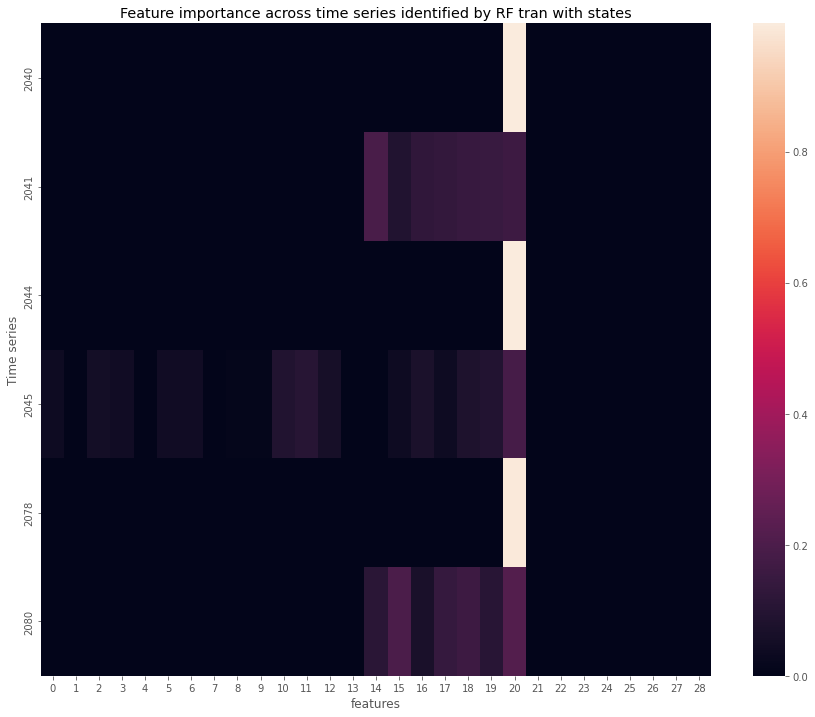

In [21]:
import matplotlib.pylab as pltlab
import seaborn as sns

heatmap_grid = []

for play in agent_infos['RF_tran'].values():
    fi = play['feature importances'][-1]
    if len(fi) == 21 + 8:
        heatmap_grid.append(fi)
    else:
        n_gap = 21+8 - len(fi)
        heatmap_grid.append([0 for _ in range(n_gap)] + fi)

data = np.array(heatmap_grid)


plt.figure(figsize=(15, 12))
sns.heatmap(data, yticklabels=agent_infos['RF_tran'].keys())
plt.xlabel('features')
plt.ylabel('Time series')
plt.title('Feature importance across time series identified by RF tran with states')
plt.show()

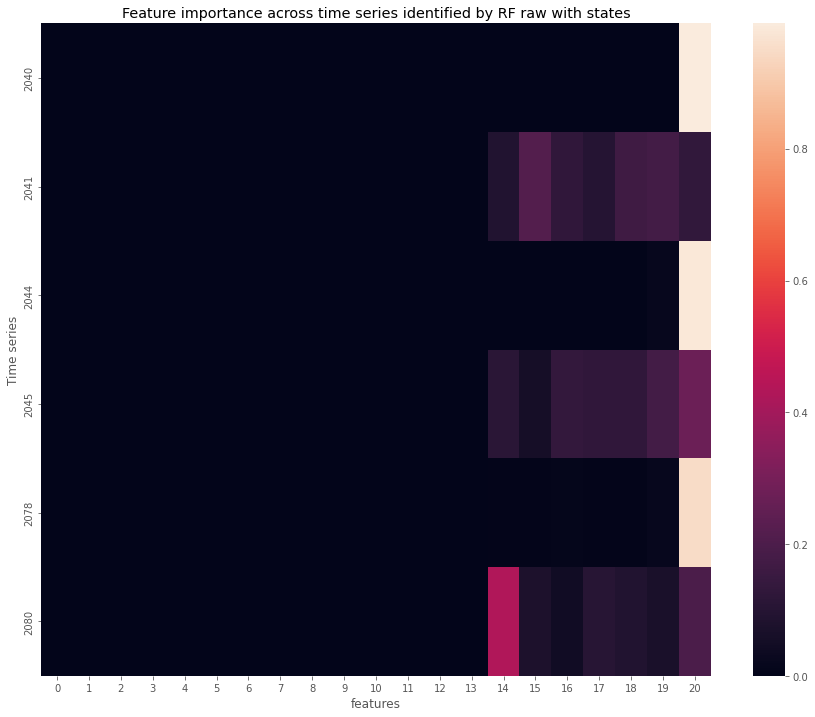

In [22]:
heatmap_grid = []

for play in agent_infos['RF_raw'].values():
    fi = play['feature importances'][-1]
    if len(fi) == 21:
        heatmap_grid.append(fi)
    else:
        n_gap = 21 - len(fi)
        heatmap_grid.append([0 for _ in range(n_gap)] + fi)

data = np.array(heatmap_grid)


plt.figure(figsize=(15, 12))
sns.heatmap(data, yticklabels=agent_infos['RF_raw'].keys())
plt.xlabel('features')
plt.ylabel('Time series')
plt.title('Feature importance across time series identified by RF raw with states')
plt.show()

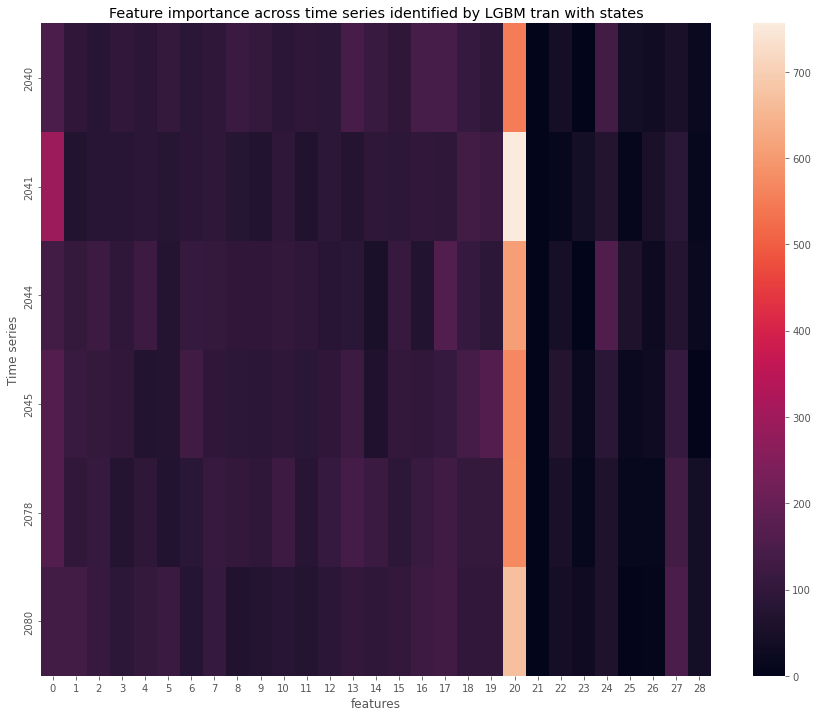

In [23]:
heatmap_grid = []

for play in agent_infos['LGBM_tran'].values():
    fi = play['feature importances'][-1]
    if len(fi) == 21 + 8:
        heatmap_grid.append(fi)
    else:
        n_gap = 21+8 - len(fi)
        heatmap_grid.append([0 for _ in range(n_gap)] + fi)

data = np.array(heatmap_grid)


plt.figure(figsize=(15, 12))
sns.heatmap(data, yticklabels=agent_infos['LGBM_tran'].keys())
plt.xlabel('features')
plt.ylabel('Time series')
plt.title('Feature importance across time series identified by LGBM tran with states')
plt.show()

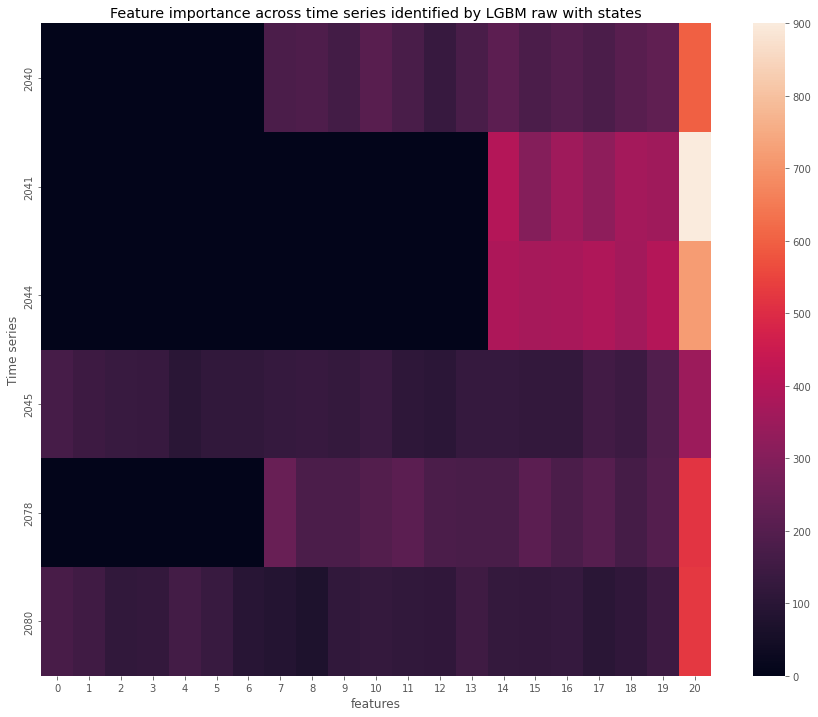

In [24]:
heatmap_grid = []

for play in agent_infos['LGBM_raw'].values():
    fi = play['feature importances'][-1]
    if len(fi) == 21:
        heatmap_grid.append(fi)
    else:
        n_gap = 21 - len(fi)
        heatmap_grid.append([0 for _ in range(n_gap)] + fi)

data = np.array(heatmap_grid)


plt.figure(figsize=(15, 12))
sns.heatmap(data, yticklabels=agent_infos['LGBM_raw'].keys())
plt.xlabel('features')
plt.ylabel('Time series')
plt.title('Feature importance across time series identified by LGBM raw with states')
plt.show()